<a href="https://colab.research.google.com/github/Khuks/Customer-Churn-Prediction/blob/main/Main_Project_Customer_Churn_Prediction_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Churn Classification** 
By Nokwanda Sihlongonyane

This is a machine learning project for the prediction if a User would churn or not. The data set contain several features, with a need application of a classification model.

so let's start importing needed libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score,recall_score 
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek 
from google.colab import files
import io
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Train.csv')

Data Exploration

In [6]:
print('Data Information Table')
display(data.info(verbose = True,show_counts=True))
print('Data Head Table')
display(data.head())
print('Data Describe Information Table')
display(data.describe())
print(f'\n Data Shape: {data.shape}')
print(f'Data Columns {data.columns}')

Data Information Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK     

None

Data Head Table


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


Data Describe Information Table


,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,699139.000000,699139.000000,714669.000000,714669.000000,714669.000000,5.472610e+05,683850.000000,629880.000000,432250.000000,84898.000000,68794.000000,1.077024e+06,626129.000000,1.077024e+06
mean,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3.368802e+03,277.065798,95.160804,23.105018,8.167483,7.709844,2.804450e+01,9.262446,1.875474e-01
std,7104.737952,13.261938,7175.625010,2391.870902,14.687059,1.289893e+04,874.315378,203.020261,64.035464,39.245883,36.090513,2.228861e+01,12.242316,3.903505e-01
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000e+00
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000e+00,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000e+00
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,2.580000e+02,27.000000,29.000000,6.000000,1.000000,2.000000,2.400000e+01,5.000000,0.000000e+00
75%,7350.000000,16.000000,7360.000000,2453.000000,20.000000,2.905000e+03,156.000000,99.000000,20.000000,3.000000,5.000000,5.100000e+01,12.000000,0.000000e+00
max,470000.000000,131.000000,532177.000000,177392.000000,91.000000,1.702309e+06,50809.000000,12040.000000,4174.000000,2507.000000,3697.000000,6.200000e+01,624.000000,1.000000e+00



 Data Shape: (1077024, 19)
Data Columns Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')


In [7]:
missing = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)

In [8]:
missing

,null
ZONE2,93.61
ZONE1,92.12
TIGO,59.87
DATA_VOLUME,49.19
FREQ_TOP_PACK,41.86
TOP_PACK,41.86
ORANGE,41.52
REGION,39.40
ON_NET,36.51
MONTANT,35.09


**Unique Values**

In [9]:
for column in data.columns : 
    print('Number of unique data for {0} is {1}'.format(column , len(data[column].unique())))
    print('unique data for {0} is {1}'.format(column , data[column].unique()))
    print('=====================================')

Number of unique data for user_id is 1077024
unique data for user_id is ['7ee9e11e342e27c70455960acc80d3f91c1286d1'
 '50443f42bdc92b10388fc56e520e4421a5fa655c'
 'da90b5c1a9b204c186079f89969aa01cb03c91b2' ...
 'd6831b8edacb7d9928b3f053fb1283574577ae42'
 'cb1f6510b084173c0deae49095f35ac29f916701'
 '28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f']
Number of unique data for REGION is 15
unique data for REGION is ['DAKAR' nan 'SAINT-LOUIS' 'THIES' 'LOUGA' 'MATAM' 'FATICK' 'KAOLACK'
 'DIOURBEL' 'TAMBACOUNDA' 'ZIGUINCHOR' 'KOLDA' 'KAFFRINE' 'SEDHIOU'
 'KEDOUGOU']
Number of unique data for TENURE is 8
unique data for TENURE is ['K > 24 month' 'E 6-9 month' 'H 15-18 month' 'G 12-15 month'
 'I 18-21 month' 'J 21-24 month' 'F 9-12 month' 'D 3-6 month']
Number of unique data for MONTANT is 4358
unique data for MONTANT is [20000.    nan  7900. ... 35475.  6216.  8949.]
Number of unique data for FREQUENCE_RECH is 120
unique data for FREQUENCE_RECH is [ 47.  nan  19.  21.   2.   1.  13.   3.   5.  14.   7.

**Needed Functions For Visualization**

In [10]:
def PlotMultiplePie(df,categorical_features = None,dropna = False):
    # set a threshold of 30 unique variables, more than 50 can lead to ugly pie charts 
    threshold = 30
    
    # if user did not set categorical_features 
    if categorical_features == None: 
        categorical_features = df.select_dtypes(['object','category']).columns.to_list()
        print(categorical_features)
    
    # loop through the list of categorical_features 
    for cat_feature in categorical_features: 
        num_unique = df[cat_feature].nunique(dropna = dropna)
        num_missing = df[cat_feature].isna().sum()
        if num_unique <= threshold:
            print('Chart for: ', cat_feature)
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            fig = px.bar(df[cat_feature].value_counts(dropna = dropna), x=cat_feature, 
                 y = df[cat_feature].value_counts(dropna = dropna).index,title = cat_feature,template='ggplot2')
    
            fig.show()
        else: 
            print('Chart for ',cat_feature,' is unavailable due high number of Unique Values ')
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            print('\n')
    return

def plotForContinousFeaturesInDataSet(data):
    continous_features = data.select_dtypes(['float64']).columns.to_list()
    for cont_feature in continous_features: 
        plt.figure()
        plt.title(cont_feature)
        ax = sns.distplot(data[cont_feature])
    return
        
def plotForDiscreteFeaturesInDataSet(data):
    discrete_features = data.select_dtypes(['int64']).columns.to_list()
    for disc_feature in discrete_features: 
        plt.figure()
        plt.title(disc_feature)
        ax = sns.distplot(data[disc_feature],kde = False)
    return

**Visualization**

In [11]:
PlotMultiplePie(data)

['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']
Chart for  user_id  is unavailable due high number of Unique Values 
Number of Unique Values:  1077024
Number of Missing Values:  0


Chart for:  REGION
Number of Unique Values:  15
Number of Missing Values:  424337


Chart for:  TENURE
Number of Unique Values:  8
Number of Missing Values:  0


Chart for:  MRG
Number of Unique Values:  1
Number of Missing Values:  0


Chart for  TOP_PACK  is unavailable due high number of Unique Values 
Number of Unique Values:  127
Number of Missing Values:  450895




/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

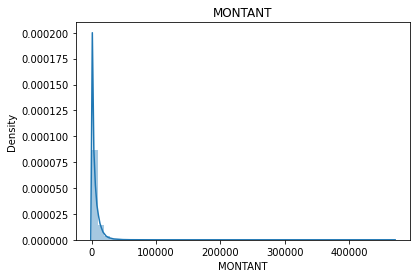

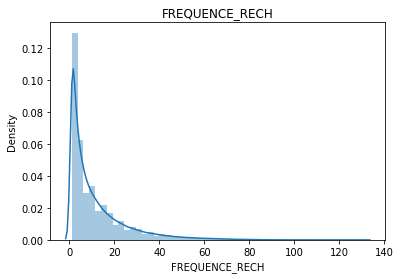

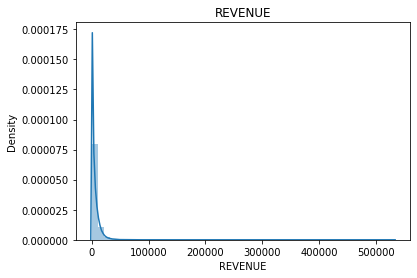

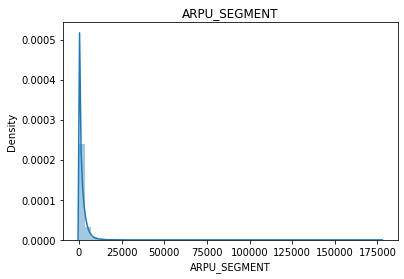

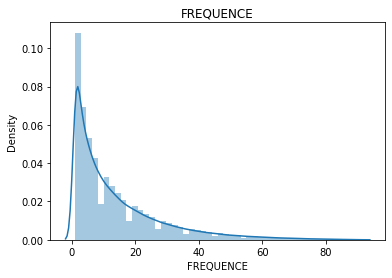

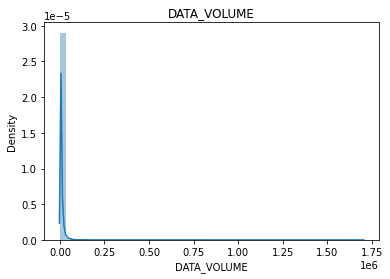

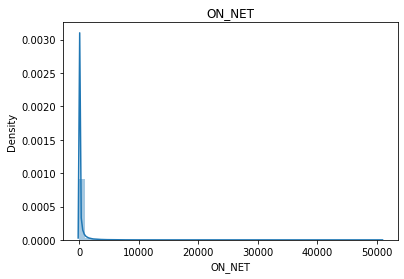

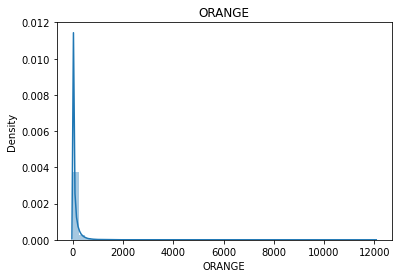

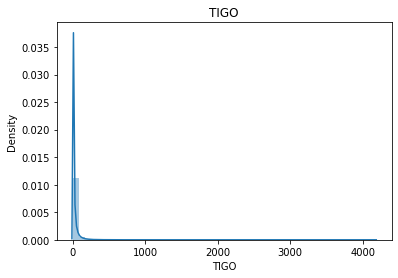

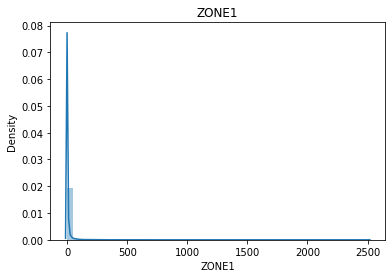

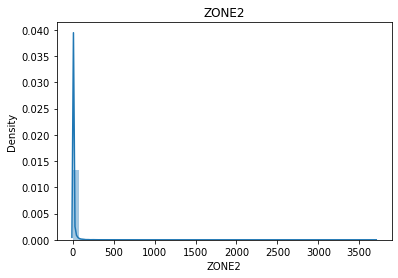

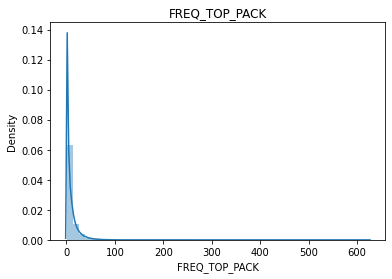

In [12]:
plotForContinousFeaturesInDataSet(data)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



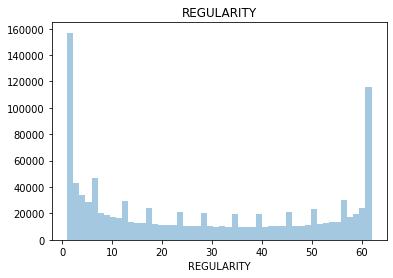

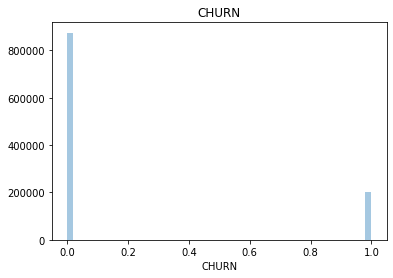

In [13]:
plotForDiscreteFeaturesInDataSet(data)

**Data Preprocessing**

Using label encoding for the categorical data

In [14]:
def make_label_encoder(original_feature , new_feature) : 
    enc  = LabelEncoder()
    enc.fit(data[original_feature])
    data[new_feature] = enc.transform(data[original_feature])
    data.drop([original_feature],axis=1, inplace=True)

In [15]:
make_label_encoder('REGION', 'REGION_CODE')

In [16]:
make_label_encoder('TOP_PACK', 'TOP_PACK_CODE')

In [17]:
data = data.drop(['MRG','user_id'], axis=1)
data['TENURE'] = data['TENURE'].map({'K > 24 month': 24, 'I 18-21 month': 18, 'H 15-18 month': 15, 'G 12-15 month':12,
                                             'J 21-24 month': 21, 'F 9-12': 9, 'E 6-9 month':6, 'D 3-6 month':3})

Replacing the null values with mean

In [18]:
def replaceDataNullsWithMean(data):
    for item in data:
        data[item].replace([np.inf, -np.inf,], np.nan, inplace=True)
        if item in list(missing.index[missing['null'] > 0]):
            data[item].fillna((data[item].mean()), inplace=True)
            
    return data

In [19]:
replaceDataNullsWithMean(data)

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,REGION_CODE,TOP_PACK_CODE
0,24.0,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,8.167483,7.709844,62,30.000000,0,0,96
1,24.0,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,3,9.262446,0,14,126
2,24.0,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,1,9.262446,0,14,126
3,24.0,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,8.167483,2.000000,61,7.000000,0,9,43
4,24.0,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,8.167483,7.709844,56,11.000000,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,24.0,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,16,9.262446,0,14,126
1077020,24.0,2500.000000,5.000000,2500.000000,833.000000,5.000000,0.000000,15.000000,77.000000,23.105018,8.167483,7.709844,34,2.000000,0,11,18
1077021,24.0,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,3,9.262446,1,14,126
1077022,24.0,600.000000,1.000000,600.000000,200.000000,1.000000,591.000000,11.000000,37.000000,5.000000,1.000000,7.709844,16,1.000000,0,14,20


In [20]:
data = data.reset_index()

In [21]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [22]:
clean_dataset(data)

,index,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,REGION_CODE,TOP_PACK_CODE
0,0.0,24.0,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,8.167483,7.709844,62.0,30.000000,0.0,0.0,96.0
1,1.0,24.0,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,3.0,9.262446,0.0,14.0,126.0
2,2.0,24.0,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,1.0,9.262446,0.0,14.0,126.0
3,3.0,24.0,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,8.167483,2.000000,61.0,7.000000,0.0,9.0,43.0
4,4.0,24.0,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,8.167483,7.709844,56.0,11.000000,0.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,1077019.0,24.0,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,16.0,9.262446,0.0,14.0,126.0
1077020,1077020.0,24.0,2500.000000,5.000000,2500.000000,833.000000,5.000000,0.000000,15.000000,77.000000,23.105018,8.167483,7.709844,34.0,2.000000,0.0,11.0,18.0
1077021,1077021.0,24.0,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,3.0,9.262446,1.0,14.0,126.0
1077022,1077022.0,24.0,600.000000,1.000000,600.000000,200.000000,1.000000,591.000000,11.000000,37.000000,5.000000,1.000000,7.709844,16.0,1.000000,0.0,14.0,20.0


In [23]:
print('Data Information Table')
display(data.info(verbose = True,show_counts=True))

Data Information Table
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072420 entries, 0 to 1077023
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   index           1072420 non-null  int64  
 1   TENURE          1072420 non-null  float64
 2   MONTANT         1072420 non-null  float64
 3   FREQUENCE_RECH  1072420 non-null  float64
 4   REVENUE         1072420 non-null  float64
 5   ARPU_SEGMENT    1072420 non-null  float64
 6   FREQUENCE       1072420 non-null  float64
 7   DATA_VOLUME     1072420 non-null  float64
 8   ON_NET          1072420 non-null  float64
 9   ORANGE          1072420 non-null  float64
 10  TIGO            1072420 non-null  float64
 11  ZONE1           1072420 non-null  float64
 12  ZONE2           1072420 non-null  float64
 13  REGULARITY      1072420 non-null  int64  
 14  FREQ_TOP_PACK   1072420 non-null  float64
 15  CHURN           1072420 non-null  int64  
 16  REGION_CODE  

None

Splitting data into train set(75%) and test set (25%)

In [24]:
xData = data.drop(['CHURN'], axis = 1)
yData = data.CHURN
x_train,x_test,y_train,y_test = train_test_split(xData, yData,test_size=0.25, random_state=42, shuffle=True, stratify=yData)

In [25]:
stdScaler = StandardScaler()
x_train_scaled = stdScaler.fit_transform(x_train)
x_test_scaled = stdScaler.transform(x_test)

In [26]:
#undersampler = RandomUnderSampler()
#oversampler = RandomOverSampler()
#smote = SMOTE()
sme = SMOTEENN(random_state=42)
smt = SMOTETomek(random_state=42)
#samplers = [undersampler, oversampler, smote]
samplers = [smt,sme]
model = LogisticRegression()
def train_model_on_sampling_techniques(model, samplers, x_train, y_train):
    for sampler in samplers:
        x_train_samp, y_train_samp = sampler.fit_resample(x_train, y_train)
        pipeline = make_pipeline(StandardScaler(), model)
        scores = cross_val_score(pipeline, x_train_samp, y_train_samp, scoring='recall')
        print("The recall score for LR using {0} is {1} (+/- {2})".format(str(sampler), round(scores.mean(), 3), round(scores.std(), 2)))

In [27]:
#train_model_on_sampling_techniques(model, samplers, x_train, y_train)

In [28]:
#x_train_samp, y_train_samp = smote.fit_resample(x_train, y_train)
#x_train_ovr, y_train_ovr = oversampler.fit_resample(x_train, y_train)
#x_train_und, y_train_und = undersampler.fit_resample(x_train, y_train)

#x_train_sme, y_train_sme = sme.fit_resample(x_train, y_train)
#x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

## Feature Importance 

Before fitting the training dataset, we need to identify the most important feature in our dataset.

We will use Random Forest Classifier to determine the most important feature.

In [29]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100,random_state=0)


In [ ]:
# fit the model to the training set

clf.fit(x_train, y_train)

Now, I will use the feature importance variable to see feature importance scores.

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores
     

In [ ]:
df = pd.DataFrame(feature_scores)
df.plot(kind='bar')
plt.title("Feature Importance Bar Chart")
plt.xlabel("Feature Name")
plt.ylabel("Feature Score")
plt.show()

## Model Building

We will implimant the following models. We will first implement them first without using any sampling algorithms. Then implememnt them through using the 
SMOTEENN and the SMOTETomek.

- Grid Search
- Decesion Tree


## a) Without Sampling Algorithm
### 1. Decesion Tree

In [ ]:
# Instantiate the grid search model
dtree_model = DecisionTreeClassifier()

In [ ]:
dtree_model.fit(x_train,y_train)

In [ ]:
pred_dtree=dtree_model.predict(x_test)
pred_dtree

#### Evaluation Metrics For Decision Tree

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_dtree))
print('MSE:', metrics.mean_squared_error(y_test,pred_dtree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_dtree)))

#### Accuracy Score For Decesion Tree


Now calculate how accurate our predictions are by calculating the accuracy.

In [ ]:
score_dtree =accuracy_score(pred_dtree,y_test)*100 
score_dtree

#### Confusion Metrix For Decision

In [ ]:
cm = confusion_matrix(y_test,pred_dtree)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0} %'.format(dtree_model.score(x_test,y_test)*100)
plt.title(all_sample_title, size = 15)

### 2. Grid Search Algorithm

In [ ]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

grid_search = GridSearchCV(estimator = dtree_model, 
                           param_grid = param_grid, 
                           scoring='roc_auc',
                           cv = 5, 
                           verbose = 1)


In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
pred_gsearch=grid_search.predict(x_test)
pred_gsearch

#### Evaluation Metrics For Grid Search Algorithm

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_gsearch))
print('MSE:', metrics.mean_squared_error(y_test,pred_gsearch))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_gsearch)))

#### Accuracy Score For Grid Search

Now calculate how accurate our predictions are by calculating the accuracy.

In [ ]:
score_gsearch =accuracy_score(pred_gsearch,y_test)*100 
score_gsearch

#### Confusion Metrix For Grid Search

In [ ]:
cm = confusion_matrix(y_test,pred_gsearch)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0} %'.format(grid_search.score(x_test,y_test)*100)
plt.title(all_sample_title, size =15)

## b) Sampling Algorithms

In [ ]:
x_train_sme, y_train_sme = sme.fit_resample(x_train, y_train)
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

## SMOTEENN Sampling Algorithm

### 1. Decision Tree

In [ ]:
# Instantiate the grid search model
dtree_model1 = DecisionTreeClassifier()
dtree_model1.fit(x_train_sme,y_train_sme)


In [ ]:
pred_dtree1=dtree_model.predict(x_test)
pred_dtree1

### Evaluation Metrics For Decision Tree

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_dtree1))
print('MSE:', metrics.mean_squared_error(y_test,pred_dtree1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_dtree1)))

### Accuracy Score For Decesion

Now calculate how accurate our predictions are by calculating the accuracy.

In [ ]:
score_dtree1 =accuracy_score(pred_dtree1,y_test)*100 
score_dtree1

### Confusion Metrix For Decision

In [ ]:
cm = confusion_matrix(y_test,pred_dtree1)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0} %'.format(dtree_model.score(x_test,y_test)*100)
plt.title(all_sample_title, size = 15)

### 2. Grid Search Algorithm

In [ ]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

grid_search1 = GridSearchCV(estimator = dtree_model, 
                           param_grid = param_grid, 
                           scoring='roc_auc',
                           cv = 5, 
                           verbose = 1)


In [ ]:
grid_search1.fit(x_train_sme,y_train_sme)

In [ ]:
pred_gsearch1=grid_search1.predict(x_test)
pred_gsearch1

#### Evaluation Metrics For Grid Search Algorithm

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_gsearch1))
print('MSE:', metrics.mean_squared_error(y_test,pred_gsearch1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_gsearch1)))

#### Accuracy Score For Grid Search

Now calculate how accurate our predictions are by calculating the accuracy.

In [ ]:
score_gsearch1 =accuracy_score(pred_gsearch1,y_test)*100 
score_gsearch1

#### Confusion Metrix For Grid Search

In [ ]:
cm = confusion_matrix(y_test,pred_gsearch1)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0} %'.format(grid_search.score(x_test,y_test)*100)
plt.title(all_sample_title, size =15)

## SMOTETomek Sampling Algorithm

### 1. Decision Tree

In [ ]:
# Instantiate the grid search model
dtree_model2 = DecisionTreeClassifier()
dtree_model2.fit(x_train_smt,y_train_smt)


In [ ]:
pred_dtree2=dtree_model.predict(x_test)
pred_dtree2

### Evaluation Metrics For Decision Tree

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_dtree2))
print('MSE:', metrics.mean_squared_error(y_test,pred_dtree2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_dtree2)))

### Accuracy Score For Decesion

Now calculate how accurate our predictions are by calculating the accuracy.

In [ ]:
score_dtree2 =accuracy_score(pred_dtree2,y_test)*100 
score_dtree2

### Confusion Metrix For Decision

In [ ]:
cm = confusion_matrix(y_test,pred_dtree2)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0} %'.format(dtree_model2.score(x_test,y_test)*100)
plt.title(all_sample_title, size = 15)

### 2. Grid Search Algorithm

In [ ]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

grid_search2 = GridSearchCV(estimator = dtree_model, 
                           param_grid = param_grid, 
                           scoring='roc_auc',
                           cv = 5, 
                           verbose = 1)


In [ ]:
grid_search2.fit(x_train_smt,y_train_smt)

In [ ]:
pred_gsearch2=grid_search2.predict(x_test)
pred_gsearch2

#### Evaluation Metrics For Grid Search Algorithm

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_gsearch2))
print('MSE:', metrics.mean_squared_error(y_test,pred_gsearch2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_gsearch2)))

#### Accuracy Score For Grid Search

Now calculate how accurate our predictions are by calculating the accuracy.

In [ ]:
score_gsearch2 =accuracy_score(pred_gsearch2,y_test)*100 
score_gsearch2

#### Confusion Metrix For Grid Search

In [ ]:
cm = confusion_matrix(y_test,pred_gsearch2)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0} %'.format(grid_search.score(x_test,y_test)*100)
plt.title(all_sample_title, size =15)